**Importation des bibliothèques**

In [ ]:
import tensorflow 
import tensorflow as tf
from tensorflow.keras import backend as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Conv2D, MaxPooling2D,Flatten,BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
import numpy

from sklearn import preprocessing

from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler


import tensorflow as tf
print(tf.__version__)

import numpy as np
print(np.__version__)

numpy.random.seed(2)
import pandas as pd


2.8.2
1.21.6


**Configurer les GPUs**

In [ ]:
config = tensorflow.compat.v1.ConfigProto()
sess = tensorflow.compat.v1.Session(config=config)


**Importation de la base**

In [ ]:
ch="1"
m="5"
dataset_e1= pd.read_csv("./stand_norm_e1.txt",delimiter=" ",header=None)
dataset_e1=numpy.array(dataset_e1,float)

X_e1 = dataset_e1[:,(0,1,2,3,4,5,6)]
#m=np.max(X_e1)
print(X_e1.shape)
dataset_e2= pd.read_csv("./stand_norm_e2.txt",delimiter=" ",header=None)
dataset_e2=numpy.array(dataset_e2,float)

X_e2 = dataset_e2[:,(0,1,2,3,4,5,6)]
#n=np.max(X_e2)
#X_e2=X_e2/n
print(X_e2.shape)
'''normalizing data with MinMaxScaler'''
scaler = preprocessing.MinMaxScaler()
X_e1_scaled = scaler.fit_transform(X_e1)
X_e2_scaled = scaler.fit_transform(X_e2)




x_train_test=np.zeros((X_e1_scaled.shape[0],X_e1_scaled.shape[1],X_e2_scaled.shape[1],1))
x_train_test[:,0,:,0]=X_e1_scaled
x_train_test[:,:,0,0]=X_e2_scaled
print(x_train_test.shape)
#print(x_test.shape)
dataset_output= pd.read_csv("./y2_e2.txt",delimiter=" ",header=None)
dataset_output=numpy.array(dataset_output,float)
dataset_output_new= dataset_output.reshape(dataset_output.shape[0], )

(13623, 7)
(13623, 7)
(13623, 7, 7, 1)


In [ ]:
for i in range (0, len(dataset_output_new)):
    print(dataset_output_new[i])

**Répartition entre l'apprentissage et test**

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_test, dataset_output_new, test_size=0.10, random_state=45)

In [ ]:
x_train_new=x_train
x_test_new=x_test

**Préparation des sorties du modèle**

In [ ]:

print(y_train.shape)

Y_train_new = tensorflow.keras.utils.to_categorical( y_train)
Y_test_new = tensorflow.keras.utils.to_categorical(y_test)
print(Y_train_new.shape)

(12260,)
(12260, 2)


In [ ]:
print(y_test)

[0. 0. 0. ... 0. 0. 0.]


**Préparation des entrées du modèle**

In [ ]:
print (x_train_new.shape)
x_train_new=x_train_new.reshape(x_train_new.shape[0], 7,7, 1)
x_test_new = x_test_new.reshape(x_test_new.shape[0], 7,7,1 )
print (x_train_new.shape)

(12260, 7, 7, 1)
(12260, 7, 7, 1)


**Construction du modèle**

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(2,2),
                 activation='relu',data_format="channels_last",padding='same',
                 input_shape=(7,7,1)))
model.add(BatchNormalization())
model.add(Conv2D(128, (2,2), activation='relu',padding='same'))

model.add(BatchNormalization())

model.add(Conv2D(256, (2,2), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=True))
model.add(Dropout(0.3))#0.3

model.add(Conv2D(512, (2,2), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=True))
model.add(Dropout(0.3))#0.3
"""
model.add(Conv2D(512, (2,2), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=True))
model.add(Dropout(0.4))#0.3
"""
"""
model.add(Conv2D(1024, (3,3), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2),strides=None))
model.add(Dropout(0.4))#0.4

"""



model.add(Flatten()) # Flatten is the input layer of the Fully Connected


model.add(Dense(100, activation='relu')) # 100 
model.add(BatchNormalization())
model.add(Dropout(0.4))#0.4
"""
model.add(Dense(200, activation='relu')) # 100 
model.add(BatchNormalization())
model.add(Dropout(0.5))#0.4
"""
#model.add(Dense(2, activation='softmax'))
model.add(Dense(2, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 7, 7, 64)          320       
                                                                 
 batch_normalization_3 (Batc  (None, 7, 7, 64)         256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 128)         32896     
                                                                 
 batch_normalization_4 (Batc  (None, 7, 7, 128)        512       
 hNormalization)                                                 
                                                                 
 conv2d_6 (Conv2D)           (None, 7, 7, 256)         131328    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 256)       

In [ ]:
#model.load_weights('./'+'weights_cnn2_t1.h5')

In [ ]:

"""initial_model = Sequential(
    [
        Conv1D(32, kernel_size=3,
                 activation='relu',data_format="channels_last",padding='same',
                 input_shape=(7,2)),
        
        
        #train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)
 
        
        Conv1D(64, 3, activation='relu',padding='same'),
        MaxPooling1D(pool_size=2,strides=None),
        Dropout(0.4),
        #Conv1D(128, 3, activation='relu',padding='same'),
        #MaxPooling1D(pool_size=2,strides=None),
        #Dropout(0.5),
        #Conv1D(256, 3, activation='relu',padding='same'),
        #MaxPooling1D(pool_size=2,strides=None),
        #Dropout(0.5),
        
        Conv1D(512, 3, activation='relu',padding='same'),
        MaxPooling1D(pool_size=2,strides=None),
        #Dropout(0.1),
        Flatten(),
        Dense(100, activation='relu'),
        Dropout(0.2),
        Dense(5, activation='relu'),
        #Dropout(0.5),
        Dense(2, activation='softmax'),


    ]
)
feature_extractor = tensorflow.keras.Model(
    inputs=initial_model.inputs,
    outputs=[layer.output for layer in initial_model.layers],)
    
initial_model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,optimizer=tensorflow.keras.optimizers.Adam(),metrics=['accuracy']) 
              
initial_model.summary()
"""

'initial_model = Sequential(\n    [\n        Conv1D(32, kernel_size=3,\n                 activation=\'relu\',data_format="channels_last",padding=\'same\',\n                 input_shape=(7,2)),\n        \n        \n        #train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size)\n \n        \n        Conv1D(64, 3, activation=\'relu\',padding=\'same\'),\n        MaxPooling1D(pool_size=2,strides=None),\n        Dropout(0.4),\n        #Conv1D(128, 3, activation=\'relu\',padding=\'same\'),\n        #MaxPooling1D(pool_size=2,strides=None),\n        #Dropout(0.5),\n        #Conv1D(256, 3, activation=\'relu\',padding=\'same\'),\n        #MaxPooling1D(pool_size=2,strides=None),\n        #Dropout(0.5),\n        \n        Conv1D(512, 3, activation=\'relu\',padding=\'same\'),\n        MaxPooling1D(pool_size=2,strides=None),\n        #Dropout(0.1),\n        Flatten(),\n        Dense(100, activation=\'relu\'),\n        Dropout(0.2),\n        Dense(5, activation=\'relu\'),\n        

In [ ]:
"""checkpointer = ModelCheckpoint(filepath='./'+'_best_weights.h5', verbose=1, monitor='val_loss', mode='auto', save_best_only=True) #save at each epoch if the validation decreased

history =initial_model.fit(x_train_new, Y_train_new, epochs=100, batch_size=512, verbose=1, validation_split=0.15, callbacks=[checkpointer])

initial_model.save('weights_cnn2_t1.h5')
"""

"checkpointer = ModelCheckpoint(filepath='./'+'_best_weights.h5', verbose=1, monitor='val_loss', mode='auto', save_best_only=True) #save at each epoch if the validation decreased\n\nhistory =initial_model.fit(x_train_new, Y_train_new, epochs=100, batch_size=512, verbose=1, validation_split=0.15, callbacks=[checkpointer])\n\ninitial_model.save('weights_cnn2_t1.h5')\n"

**Effectuer l'apprentissage**

In [ ]:
checkpointer = ModelCheckpoint(filepath='./'+'_best_weights.h5', verbose=1, monitor='val_loss', mode='auto', save_best_only=True) #save at each epoch if the validation decreased

history =model.fit(x_train_new, Y_train_new, epochs=350, batch_size=1024, verbose=1, validation_split=0.1, callbacks=[checkpointer])

model.save('weights_cnn2_t1.h5')

**Evalutations**

In [ ]:

score = model.evaluate(x_test_new, Y_test_new, verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])
print (score)

43/43 [==============================] - 0s 8ms/step - loss: 0.0967 - accuracy: 0.9773 - precision_1: 0.9773 - recall_1: 0.9773
[0.09666824340820312, 0.9772560596466064, 0.9772560596466064, 0.9772560596466064]


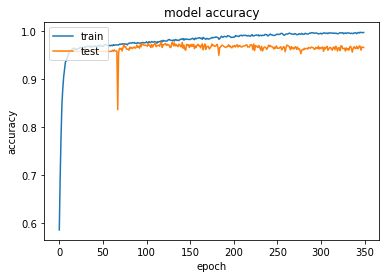

In [ ]:
import matplotlib.pyplot as plt # shorcut for a plot function
plt.plot(history.history['accuracy']) # training accuracy
plt.plot(history.history['val_accuracy']) # validation accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

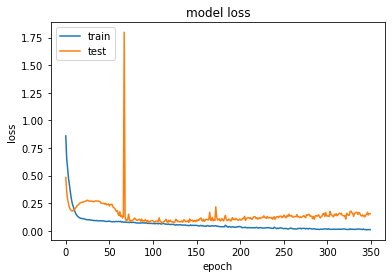

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

predictions = model.predict(x_test_new,  verbose=1)
print ("predicted images size :",predictions.shape)
print(predictions)
print(Y_test_new.shape)

43/43 [==============================] - 0s 3ms/step
predicted images size : (1363, 2)
[[9.9992824e-01 7.1735856e-05]
 [9.8694152e-01 1.3058519e-02]
 [9.9964797e-01 3.5199203e-04]
 ...
 [9.9964654e-01 3.5341564e-04]
 [9.9937928e-01 6.2075391e-04]
 [9.9970382e-01 2.9617787e-04]]
(1363, 2)


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
threshold_confusion = 0.5

print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((predictions.shape[0]))
y_test = np.empty((predictions.shape[0]))
print(Y_test_new)
for i in range(predictions.shape[0]):
    #print(predictions[i])
    y_pred[i]=np.argmax(predictions[i])
    y_test[i]=np.argmax(Y_test_new[i])
print(y_pred)
print(y_test)  
       
confusion = confusion_matrix(y_test,  y_pred)

print(confusion)


Confusion matrix:  Custom threshold (for positive) of 0.5
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[[1307    7]
 [  24   25]]


In [ ]:
numpy.savetxt("./y_pred_30.txt",y_pred,delimiter=" ",fmt='%f')

In [ ]:
print (confusion)
print("The accuracy score on this random test-set is  :", accuracy_score(y_test,  y_pred) )
recall=recall_score(y_test,  y_pred, average=None)
av_recall=sum(recall)/2
print("recall",recall, "the avreage recall is ",av_recall)
precision=precision_score(y_test,  y_pred,average=None)
av_precision=sum(precision)/2

print("precision",precision,"the avreage precision is ",av_precision)

F1_score=(2*av_precision*av_recall)/(av_precision+av_recall)
print("F1_score",F1_score)

[[1307    7]
 [  24   25]]
The accuracy score on this random test-set is  : 0.9772560528246516
recall [0.99467275 0.51020408] the avreage recall is  0.7524384182896904
precision [0.98196844 0.78125   ] the avreage precision is  0.881609222389181
F1_score 0.8119183704687155


In [ ]:
model.load_weights('./_best_weights.h5')
predictions = model.predict(x_test_new, batch_size=32, verbose=2)
print ("predicted images size :",predictions.shape)
print(predictions)
print(Y_test_new.shape)
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
threshold_confusion = 0.2
print(y_test)
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred = np.empty((predictions.shape[0]))
y_test = np.empty((predictions.shape[0]))
for i in range(predictions.shape[0]):
    
    y_pred[i]=np.argmax(predictions[i])
    y_test[i]=np.argmax(Y_test_new[i])
#print(y_pred)
print(y_test)  
       
confusion = confusion_matrix(y_test,  y_pred)
print (confusion)
print("The accuracy score on this random test-set is  :", accuracy_score(y_test,  y_pred) )
recall=recall_score(y_test,  y_pred, average=None)
av_recall=sum(recall)/2
print("recall",recall, "the avreage recall is ",av_recall)
precision=precision_score(y_test,  y_pred,average=None)
av_precision=sum(precision)/2

print("precision",precision,"the avreage precision is ",av_precision)

F1_score=(2*av_precision*av_recall)/(av_precision+av_recall)
print("F1_score",F1_score)

43/43 - 0s - 130ms/epoch - 3ms/step
predicted images size : (1363, 2)
[[9.9991262e-01 8.7369262e-05]
 [8.2988113e-01 1.7011888e-01]
 [9.9961144e-01 3.8863774e-04]
 ...
 [9.9787438e-01 2.1256024e-03]
 [9.9752074e-01 2.4792571e-03]
 [9.9764913e-01 2.3508475e-03]]
(1363, 2)
[0. 0. 0. ... 0. 0. 0.]

Confusion matrix:  Custom threshold (for positive) of 0.2
[0. 0. 0. ... 0. 0. 0.]
[[1308    6]
 [  22   27]]
The accuracy score on this random test-set is  : 0.979457079970653
recall [0.99543379 0.55102041] the avreage recall is  0.7732270990588015
precision [0.98345865 0.81818182] the avreage precision is  0.9008202323991799
F1_score 0.8321611963800992


426/426 - 1s - 1s/epoch - 2ms/step
predicted images size : (13623, 2)
[[9.9848914e-01 1.5108451e-03]
 [9.9961013e-01 3.8993717e-04]
 [9.9827921e-01 1.7208117e-03]
 ...
 [9.3391705e-01 6.6083029e-02]
 [9.2725241e-01 7.2747603e-02]
 [9.2919379e-01 7.0806220e-02]]


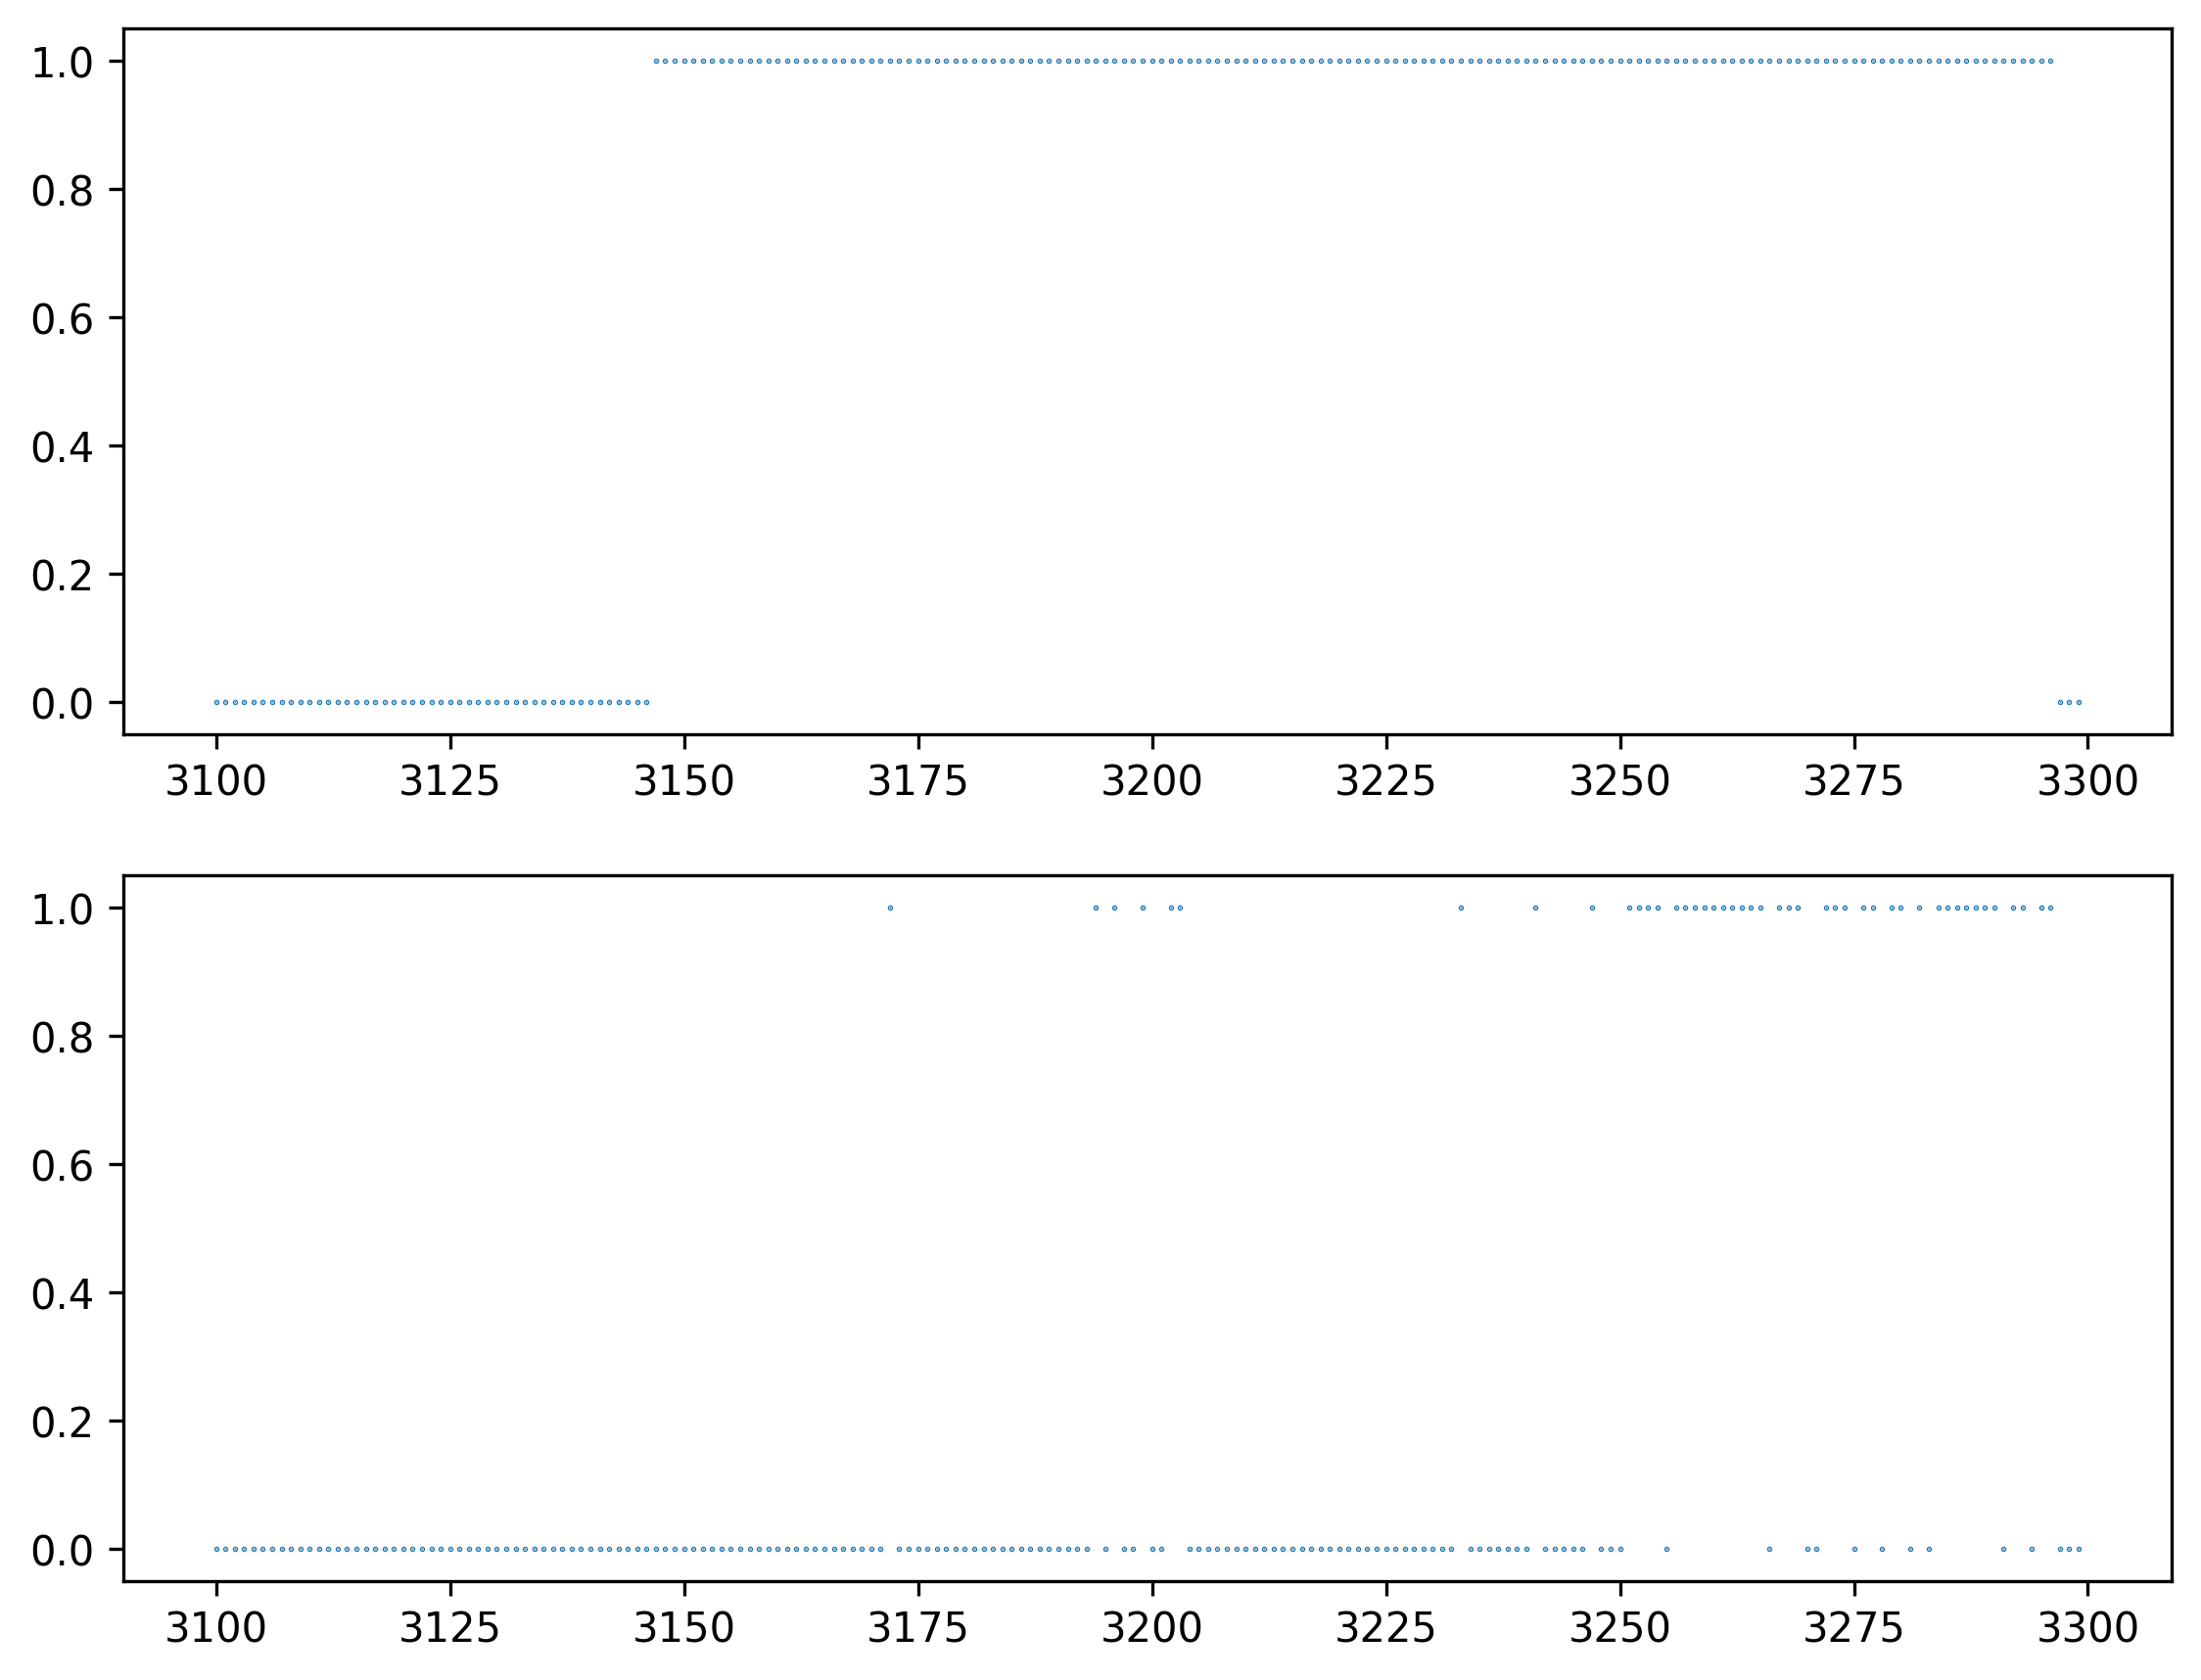

In [ ]:
predictions_all = model.predict(x_train_test, batch_size=32, verbose=2)
print ("predicted images size :",predictions_all.shape)
print(predictions_all)

from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
threshold_confusion = 0.2

y_pred_all = np.empty((predictions_all.shape[0]))
#y_test_all = np.empty((predictions_all.shape[0]))
for i in range(predictions_all.shape[0]):
    
    y_pred_all[i]=np.argmax(predictions_all[i])
#    y_test_all[i]=np.argmax( dataset_output_new[i])
#print(y_pred)
 
plt.figure(figsize=(9, 7), dpi=300)
plt.xlim(3100, 3300)
plt.xticks (range(3100,3300,10))

plt.subplot(2, 1,1)

plt.scatter(range(3100,3300),dataset_output_new[3100:3300],0.1)


#plt.figure(figsize=(9, 7), dpi=100)
plt.subplot(2, 1,2)

plt.scatter(range(3100,3300),y_pred_all[3100:3300],0.1)

plt.show()

In [ ]:
#Model Evaluation :
#-------------------------------

def evaluate(classifier,X,y):
    
    
    """
    from sklearn.model_selection import cross_val_score
    #calculating cross validated accuracy
    scores = cross_val_score(classifier, X, y, cv=10, scoring='accuracy')
    cross_validated_accuracy = scores.mean()
    print('Cross validation score: %.2f%%  plus or minus(%.2f)'% (scores.mean()*100, scores.std()*100))
    print('-----------------------------------------------------------')
    print("Evaluating the classifier on a random split of the data :")

    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)  
    classifier.fit(X_train, y_train)
    """
    y_pred_class = classifier.predict(X)
    
    from sklearn.metrics import accuracy_score
    overall_accuracy = accuracy_score(y,y_pred_class,)
    
    # calculate the confusion mtatrix
    from sklearn import metrics
    P = metrics.confusion_matrix(y, y_pred_class)
    print(P)

    print("The accuracy score on this random test-set is  :", accuracy_score(y,  y_pred_class) )
    recall=recall_score(y,  y_pred_class, average=None)
    av_recall=sum(recall)/2
    print("recall",recall, "the avreage recall is ",av_recall)
    precision=precision_score(y,  y_pred_class,average=None)
    av_precision=sum(precision)/2

    print("precision",precision,"the avreage precision is ",av_precision)

    F1_score=(2*av_precision*av_recall)/(av_precision+av_recall)
    print("F1_score",F1_score)
    
    
    print("########################The accuracy score on this random test-set is  :"+ str(round(overall_accuracy,2)*100) + "%")


    #Class 0
    TP0 = P[0][0] #True Positives (0 is predicted)
    TN0 = P[1][1] + P[2][1] + P[1][2] + P[2][2] #True Negatives (it's not 0 and it predicted 1 or 2)
    FP0 = P[0][1] + P[0][2] #False Positive (it is not 0 and it predicted 0)
    FN0 = P[1][0] + P[2][0] #False (it is 0 and it predicted 1 or 2 )

    #Precision :
    #Precision is a multi-class confusion matrix is the measure of the accuracy relative to the prediction of a specific class. 
    Precision0 = TP0/(TP0+FP0)

    #Recall or Sensitivity : True Positive Rate
    #Sensitivity (True Positive rate) measures the proportion of positives that are correctly identified (i.e. the proportion of those who have some condition (affected) who are correctly identified as having the condition).
    Recall0 = TP0 / (TP0+FN0)

    #Specificity : True Negative Rate
    #Specificity (True Negative rate) measures the proportion of negatives that are correctly identified (i.e. the proportion of those who do not have the condition (unaffected) who are correctly identified as not having the condition).
    Specificity0 = TN0 / (TN0+FP0)

    F1_score0=(2*Precision0*Recall0)/(Precision0+Recall0)

    #-------------------------------

    # Class 1 :
    TP1 = P[1][1] #True Positives
    TN1 = P[0][0] + P[2][0] + P[0][2] + P[2][2] #True Negatives
    FP1 = P[1][0] + P[1][2] #False Positive
    FN1 = P[0][1] + P[2][1] #False Negative

    #Precision is a multi-class confusion matrix is the measure of the accuracy relative to the prediction of a specific class. 
    Precision1 = TP1/(TP1+FP1)

    #Recall or Sensitivity : True Positive Rate
    #Sensitivity (True Positive rate) measures the proportion of positives that are correctly identified (i.e. the proportion of those who have some condition (affected) who are correctly identified as having the condition).
    Recall1 = TP1 / (TP1+FN1)

    #Specificity : True Negative Rate
    #Specificity (True Negative rate) measures the proportion of negatives that are correctly identified (i.e. the proportion of those who do not have the condition (unaffected) who are correctly identified as not having the condition).
    Specificity1 = TN1 / (TN1+FP1)

    F1_score1=(2*Precision1*Recall1)/(Precision1+Recall1)  

    #-------------------------------

    # Class 2 :
    TP2 = P[2][2] #True Positives
    TN2 = P[0][0] + P[1][0] + P[1][1] + P[0][1] #True Negatives
    FP2 = P[2][0] + P[2][1] #False positive  (it is not 0 and it predict 0)
    FN2 = P[0][2] + P[1][2] #False Negative

    #Precision is a multi-class confusion matrix is the measure of the accuracy relative to the prediction of a specific class. 
    Precision2 = TP2/(TP2+FP2)

    #Recall or Sensitivity : True Positive Rate
    #Sensitivity (True Positive rate) measures the proportion of positives that are correctly identified (i.e. the proportion of those who have some condition (affected) who are correctly identified as having the condition).
    Recall2 = TP2 / (TP2+FN2)

    #Specificity : True Negative Rate
    #Specificity (True Negative rate) measures the proportion of negatives that are correctly identified (i.e. the proportion of those who do not have the condition (unaffected) who are correctly identified as not having the condition).
    Specificity2 = TN2 / (TN2+FP2)

    F1_score2=(2*Precision2*Recall2)/(Precision2+Recall2)
    
    #Plotting the results :
    #Plotting The Confusion Matrix
    from sklearn.metrics import plot_confusion_matrix
    plot_confusion_matrix(classifier,
                      X,
                      y,
                      values_format='d',
                      display_labels=["0","1","2"]
                     )
    
    
    #Plotting the score for the metrics for each class
    
    
    import numpy as np
    import matplotlib.pyplot as plt

    N = 3
    recall = np.around(np.array((Recall0,Recall1,Recall2))*100, decimals=2)
    F1_score=np.around(np.array((F1_score0,F1_score1,F1_score2))*100, decimals=2)
    ind = np.arange(N)  # the x locations for the groups
    width = 0.2       # the width of the bars

    fig, ax = plt.subplots(figsize=(10,5))
    rects1 = ax.bar(ind, recall, width, color='r')
    av_recall=sum(recall)/2
    print("recall",recall, "the avreage recall is ",av_recall)
    
    precision  = np.around(np.array((Precision0,Precision1,Precision2))*100, decimals=2)
    
    
    rects2 = ax.bar(ind + width, precision, width, color='g')
    av_precision=sum(precision)/2
    print("precision",precision,"the avreage precision is ",av_precision)
    specificity   = np.around(np.array((Specificity0,Specificity1,Specificity2))*100, decimals=2)
    rects3 = ax.bar(ind + 2*width, specificity, width, color='y')
    av_specificity=sum(specificity)/2
    print("specificity",specificity,"the avreage specificity is ",av_specificity)
    
    av_F1_score=(sum(F1_score)/2)
    print("F1_score",F1_score,"the avreage F1_score is ",av_F1_score)
    # add some text for labels, title and axes ticks
    ax.set_ylabel('Metrics (%)')
    ax.set_title('Model Evaluation')
    ax.set_xticks(ind + width / 2)
    ax.set_xticklabels(('Output_Value_0', 'Output_Value_1', 'Output_Value_2'))
    
    
    ax.legend((rects1[0], rects2[0],rects3[0]), ('Recall', 'Precision','Specificity'),loc=(1.05, 0.5),prop={"size":15})
    
    """
    ax.bar_label(rects1, padding=-40)
    ax.bar_label(rects2, padding=-40)
    ax.bar_label(rects3, padding=-40)
    """
    
   
    plt.show()
evaluate(model,x_test_new,y_test)   

    

ValueError: ignored

In [ ]:
z=[]
for i in range(len(y_pred_all)):
    if(y_pred_all[i][0]==1):
        z.append(i)
print(z)

In [ ]:
d=[63,2025]
chb=[1864, 5763]
d=numpy.array(d)
chb=numpy.array(chb)
rs=[]
for l in range (2025,5763):
  if((y_pred_all[l][0]==1) and (y_pred_all[l+1][0]==1) and (y_pred_all[l+2][0]==1)):
    rs.append(l)
    continue
  

print(rs)
k=5763-2264

print("the duration before seizure in min is", (k*2)/60)

In [ ]:
dataset_output= pd.read_csv("./y_chb"+ch+"_15min.txt",delimiter=" ",header=None)
dataset_output=numpy.array(dataset_output,float)
dataset_output_new= dataset_output.reshape(dataset_output.shape[0], )

In [ ]:
print(dataset_output_new)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train_test, dataset_output_new, test_size=0.2, random_state=42)

In [ ]:
x_train_new=x_train
x_test_new=x_test

In [ ]:
print(y_test)

In [ ]:
Y_train_new = tensorflow.keras.utils.to_categorical( y_train)
Y_test_new = tensorflow.keras.utils.to_categorical(y_test)
print(Y_train_new.shape)

In [ ]:
model = Sequential()
model.add(Conv1D(32, kernel_size=3,
                 activation='relu',data_format="channels_last",padding='same',
                 input_shape=(7,2)))
model.add(BatchNormalization())
model.add(Conv1D(64, 3, activation='relu',padding='same'))

model.add(BatchNormalization())
model.add(Conv1D(128, 3, activation='relu',padding='same'))

model.add(MaxPooling1D(pool_size=2,strides=True))
model.add(Dropout(0.3))#0.1
model.add(Conv1D(512, 3, activation='relu',padding='same'))
model.add(MaxPooling1D(pool_size=2,strides=None))
model.add(Dropout(0.4))#0.1

model.add(Flatten()) # Flatten is the input layer of the Fully Connected
model.add(Dense(100, activation='relu')) # gets input size from flatten
model.add(BatchNormalization())
model.add(Dropout(0.4))#0.2
model.add(Dense(2, activation='softmax',kernel_regularizer=regularizers.l2(0.001)))
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='./'+'_best_weights_1h.h5', verbose=1, monitor='val_loss', mode='auto', save_best_only=True) #save at each epoch if the validation decreased

history =model.fit(x_train_new, Y_train_new, epochs=100, batch_size=512, verbose=1, validation_split=0.15, callbacks=[checkpointer])

model.save('weights_cnn2_t1_1h.h5')

In [ ]:
score = model.evaluate(x_test_new, Y_test_new, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
import matplotlib.pyplot as plt # shorcut for a plot function
plt.plot(history.history['accuracy']) # training accuracy
plt.plot(history.history['val_accuracy']) # validation accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
predictions_1h = model.predict(x_test_new, batch_size=32, verbose=2)

print ("predicted images size :",predictions_1h.shape)
print(predictions_1h)
print(Y_test_new.shape)
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score
threshold_confusion = 0.5
print(y_test)
print ("\nConfusion matrix:  Custom threshold (for positive) of " +str(threshold_confusion))
y_pred_1h = np.empty((predictions_1h.shape[0]))
y_test = np.empty((predictions_1h.shape[0]))
for i in range(predictions_1h.shape[0]):
    
    y_pred_1h[i]=np.argmax(predictions_1h[i])
    y_test[i]=np.argmax(Y_test_new[i])
print(y_pred_1h)
"""  
for i in range (0, len(y_pred_1h)):
  if (y_pred_1h[i]==0):
    y_pred_1h[i]=1
  else: 
    y_pred_1h[i]=0
"""
print(y_test)
confusion = confusion_matrix(y_test,  y_pred_1h)
print (confusion)
numpy.savetxt("./y_pred_1h.txt",y_pred_1h,delimiter=" ",fmt='%f')
print("The accuracy score on this random test-set is  :", accuracy_score(y_test,  y_pred_1h) )

recall=recall_score(y_test,  y_pred_1h, average=None)
av_recall=sum(recall)/2
print("recall",recall, "the avreage recall is ",av_recall)
precision=precision_score(y_test,  y_pred_1h,average=None)
av_precision=sum(precision)/2

print("precision",precision,"the avreage precision is ",av_precision)

F1_score=(2*av_precision*av_recall)/(av_precision+av_recall)
print("F1_score",F1_score)

In [ ]:
predictions_all = model.predict(x_train_test, batch_size=32, verbose=2)
print ("predicted images size :",predictions_all.shape)
print(predictions_all)


In [ ]:
y_pred_all=predictions_all

for i in range(predictions_all.shape[0]):
    
    y_pred_all[i]=np.argmax(predictions_all[i])
print(y_pred_all)

In [ ]:
z=[]
for i in range(len(y_pred_all)):
    if(y_pred_all[i][0]==1):
        z.append(i)
print(z)

In [ ]:
predictions_all = model.predict(x_train_test, batch_size=32, verbose=2)
print ("predicted images size :",predictions_all.shape)
print(predictions_all)

In [ ]:
d=[67,2025]
chb=[3297, 6265, 9859, 13530]
d=numpy.array(d)
chb=numpy.array(chb)
rs=[]
for l in range (67,1864):
  if((y_pred_all[l][0]==1) and (y_pred_all[l+1][0]==1) and (y_pred_all[l+2][0]==1)):
    rs.append(l)
    continue
  

print(rs)
k=1864-68

print("the duration before seizure in min is", (k*2)/60)